# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df= pd.read_csv('porter_data_1.csv')
df

market_id           created_at actual_delivery_time  \
0             1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1             2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2             2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3             1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4             1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   
...           ...                  ...                  ...   
175772        1.0  2015-02-17 00:19:41  2015-02-17 01:02:41   
175773        1.0  2015-02-13 00:01:59  2015-02-13 01:03:59   
175774        1.0  2015-01-24 04:46:08  2015-01-24 05:32:08   
175775        1.0  2015-02-01 18:18:15  2015-02-01 19:03:15   
175776        1.0  2015-02-08 19:24:33  2015-02-08 20:01:33   

        store_primary_category  order_protocol  total_items  subtotal  \
0                            4             1.0            4      3441   
1                           46             2.0            1      1900   
2                           36             3.0            4      4771   
3                           38             1.0            1      1525   
4                           38             1.0            2      3620   
...                        ...             ...          ...       ...   
175772                      28             4.0            3      1389   
175773                      28             4.0            6      3010   
175774                      28             4.0            5      1836   
175775                      58             1.0            1      1175   
175776                      58             1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        2            1425            2195   
...                    ...             ...             ...   
175772                   3             345             649   
175773                   4             405             825   
175774                   3             300             399   
175775                   1             535             535   
175776                   4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                        33.0                14.0                      21.0   
1                         1.0                 2.0                       2.0   
2                         8.0                 6.0                      18.0   
3                         5.0                 6.0                       8.0   
4                         5.0                 5.0                       7.0   
...                       ...                 ...                       ...   
175772                   17.0                17.0                      23.0   
175773                   12.0                11.0                      14.0   
175774                   39.0                41.0                      40.0   
175775                    7.0                 7.0                      12.0   
175776                   20.0                20.0                      23.0   

        distance  
0          34.44  
1          27.60  
2          11.56  
3          31.80  
4           8.20  
...          ...  
175772     13.24  
175773     36.60  
175774     31.80  
175775     15.36  
175776      5.36  

[175777 rows x 14 columns]

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [3]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format as required.

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert category fields to appropriate data type

In [4]:
# Convert category features to category type as appropriate data types

cat_cols = ['market_id', 'store_primary_category', 'order_protocol', 'order_status', 'delivery_status', 'payment_method']
for col in cat_cols:
	if col in df.columns:
		df[col] = df[col].astype('category')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [6]:
# Calculate time taken in minutes from order creation time to actual delivery time
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df

market_id          created_at actual_delivery_time  \
0            1.0 2015-02-06 22:24:17  2015-02-06 23:11:17   
1            2.0 2015-02-10 21:49:25  2015-02-10 22:33:25   
2            2.0 2015-02-16 00:11:35  2015-02-16 01:06:35   
3            1.0 2015-02-12 03:36:46  2015-02-12 04:35:46   
4            1.0 2015-01-27 02:12:36  2015-01-27 02:58:36   
...          ...                 ...                  ...   
175772       1.0 2015-02-17 00:19:41  2015-02-17 01:02:41   
175773       1.0 2015-02-13 00:01:59  2015-02-13 01:03:59   
175774       1.0 2015-01-24 04:46:08  2015-01-24 05:32:08   
175775       1.0 2015-02-01 18:18:15  2015-02-01 19:03:15   
175776       1.0 2015-02-08 19:24:33  2015-02-08 20:01:33   

       store_primary_category order_protocol  total_items  subtotal  \
0                           4            1.0            4      3441   
1                          46            2.0            1      1900   
2                          36            3.0            4      4771   
3                          38            1.0            1      1525   
4                          38            1.0            2      3620   
...                       ...            ...          ...       ...   
175772                     28            4.0            3      1389   
175773                     28            4.0            6      3010   
175774                     28            4.0            5      1836   
175775                     58            1.0            1      1175   
175776                     58            1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        2            1425            2195   
...                    ...             ...             ...   
175772                   3             345             649   
175773                   4             405             825   
175774                   3             300             399   
175775                   1             535             535   
175776                   4             425             750   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                        33.0                14.0                      21.0   
1                         1.0                 2.0                       2.0   
2                         8.0                 6.0                      18.0   
3                         5.0                 6.0                       8.0   
4                         5.0                 5.0                       7.0   
...                       ...                 ...                       ...   
175772                   17.0                17.0                      23.0   
175773                   12.0                11.0                      14.0   
175774                   39.0                41.0                      40.0   
175775                    7.0                 7.0                      12.0   
175776                   20.0                20.0                      23.0   

        distance  time_taken  
0          34.44        47.0  
1          27.60        44.0  
2          11.56        55.0  
3          31.80        59.0  
4           8.20        46.0  
...          ...         ...  
175772     13.24        43.0  
175773     36.60        62.0  
175774     31.80        46.0  
175775     15.36        45.0  
175776      5.36        37.0  

[175777 rows x 15 columns]

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [7]:
# Extract the hour and day of week from the 'created_at' timestamp for the order placed during the day of the week.
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek


# Creating a category feature 'isWeekend' to know whether the order was placed on a weekend or not.
df['isWeekend'] = df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0).astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

In [8]:
# Drop unnecessary columns in created_at and actual_delivery_time as time_taken is already calculated.
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  int64   
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken                175777 non-null  float64 
 13  order_hour                175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [9]:
# Define target variable (y) and features (X)

# Here are the dependent and the feature variables we will use   
# y = 'time_taken'
# X = 'market_id', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
#     'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance'

y = df['time_taken']
X = df.drop('time_taken', axis=1)



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [10]:
#Build the training and test datasets using scikit learn model selection.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [11]:
# ing the train and test split data frames 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(123043, 15)
(52734, 15)
(123043,)
(52734,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [16]:
# Define category and number columns for easy EDA and data manipulation

number_columns = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price','total_onshift_dashers',
    'total_busy_dashers','total_outstanding_orders','distance'
]

category_columns = [
    'market_id', 'store_primary_category', 'order_protocol',
    'created_at_hour','created_at_dayofweek','isWeekend'
]




##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for number columns in the training set to understand their spread and any skewness

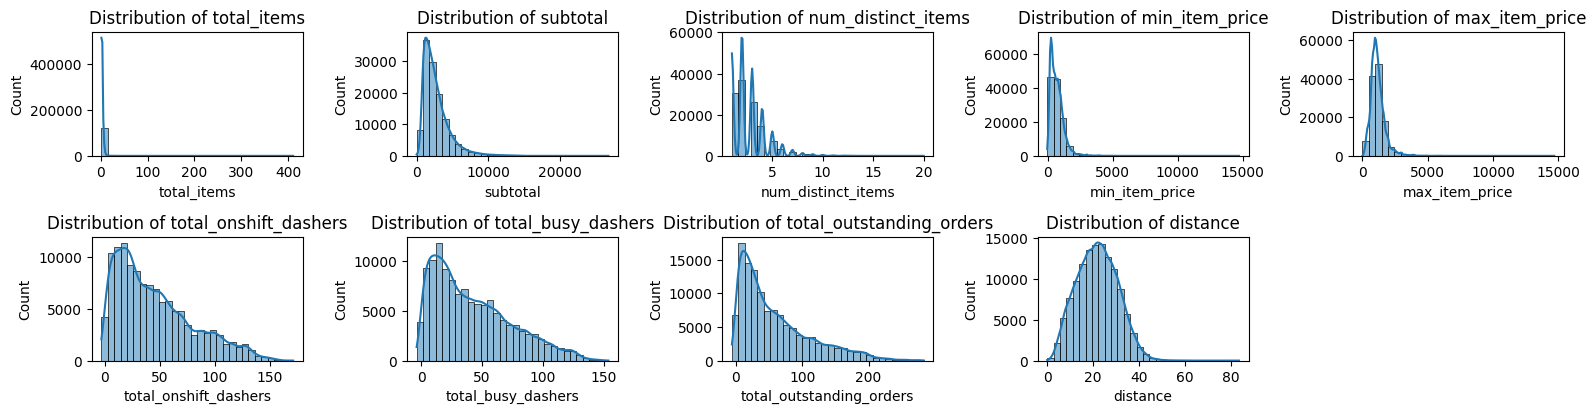

In [18]:
# Plot distributions for all number columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(number_columns, 1):
    plt.subplot(6, 5, i)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



In [19]:
X_train[number_columns].describe()

total_items       subtotal  num_distinct_items  min_item_price  \
count  123043.000000  123043.000000       123043.000000   123043.000000   
mean        3.206082    2697.863625            2.674951      684.784506   
std         2.745043    1830.338637            1.625552      520.731071   
min         1.000000       0.000000            1.000000      -52.000000   
25%         2.000000    1417.000000            2.000000      299.000000   
50%         3.000000    2220.000000            2.000000      595.000000   
75%         4.000000    3405.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   123043.000000          123043.000000       123043.000000   
mean      1160.434645              44.981177           41.879180   
std        562.955073              34.568806           32.149659   
min          0.000000              -3.000000           -4.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   

       total_outstanding_orders       distance  
count             123043.000000  123043.000000  
mean                  58.276651      21.830150  
std                   52.689697       8.765038  
min                   -6.000000       0.000000  
25%                   17.000000      15.320000  
50%                   41.000000      21.760000  
75%                   85.000000      28.120000  
max                  283.000000      83.520000

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of category features

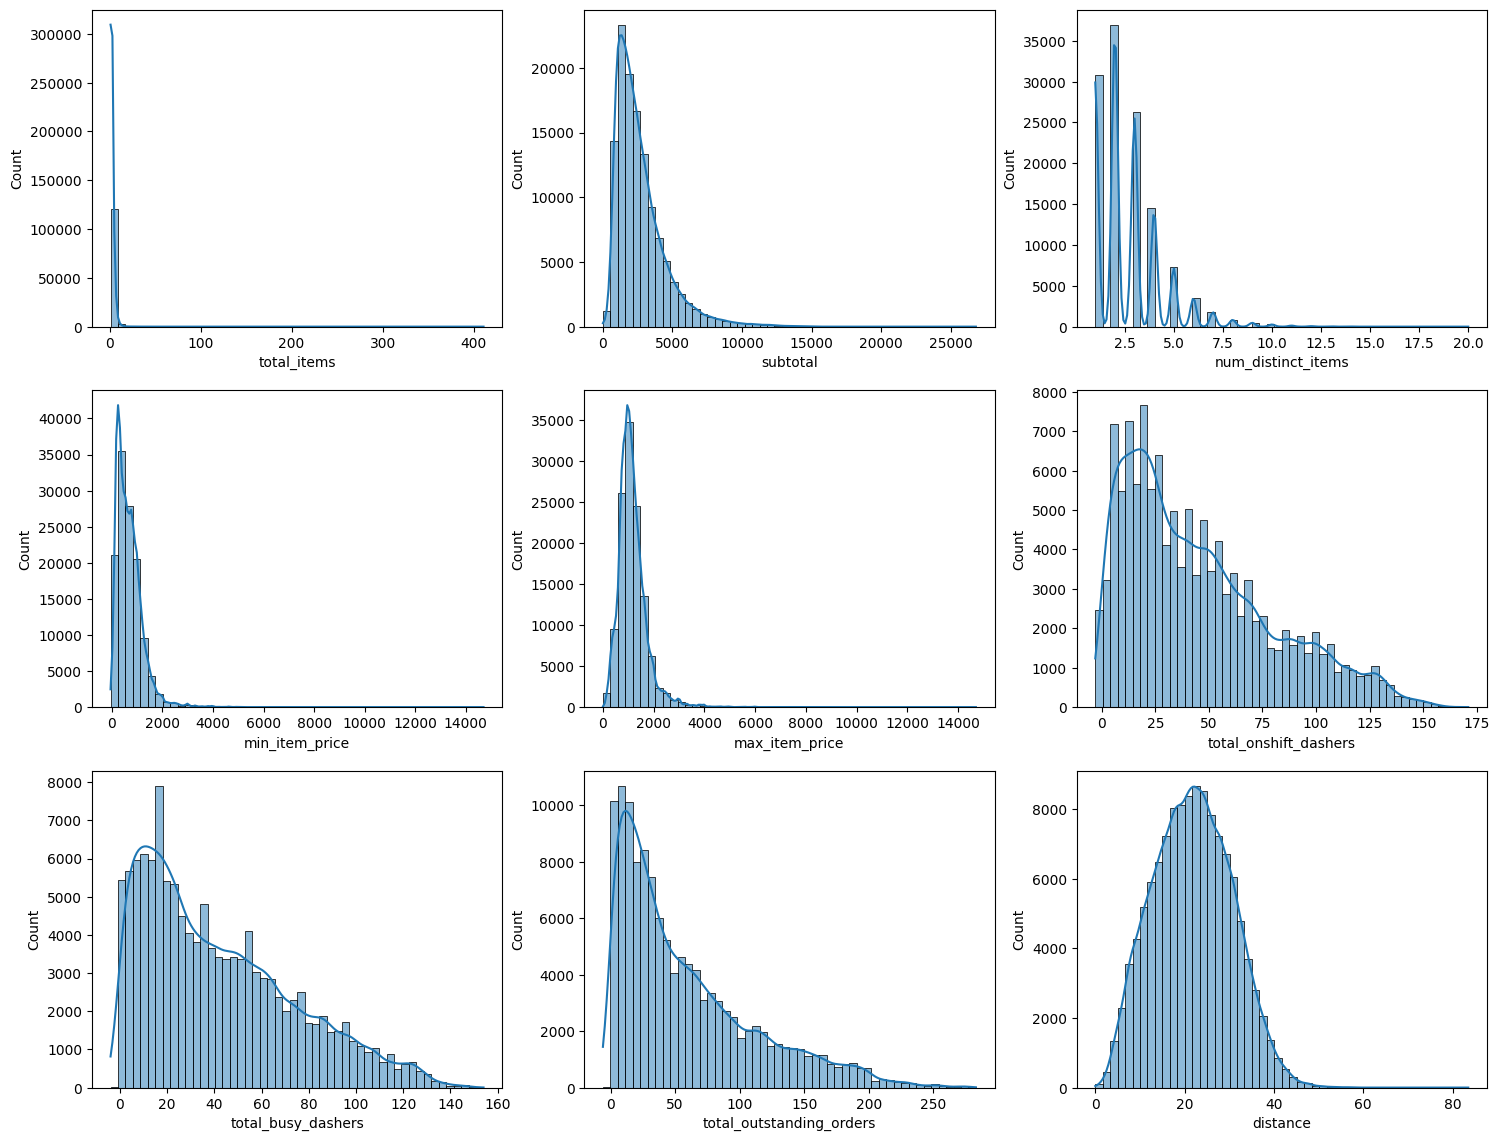

In [24]:
# Plot the distribution of category columns in the training set
index = 1
plt.figure(figsize=(18,14))
for col in number_columns:
    plt.subplot(3, 3, index)
    sns.histplot(X_train[col], kde=True, bins=50)
    index = index + 1
plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

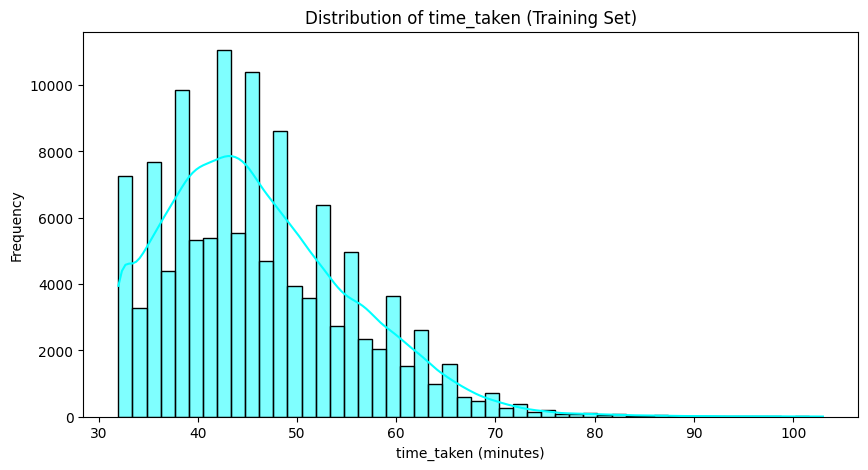

In [25]:
# Distribution of time_taken in minutes in the training set
plt.figure(figsize=(10,5))
sns.histplot(y_train, kde=True, bins=50, color='cyan')
plt.title('Distribution of time_taken (Training Set)')
plt.xlabel('time_taken (minutes)')
plt.ylabel('Frequency')
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important number and category features to observe how they relate to `time_taken`

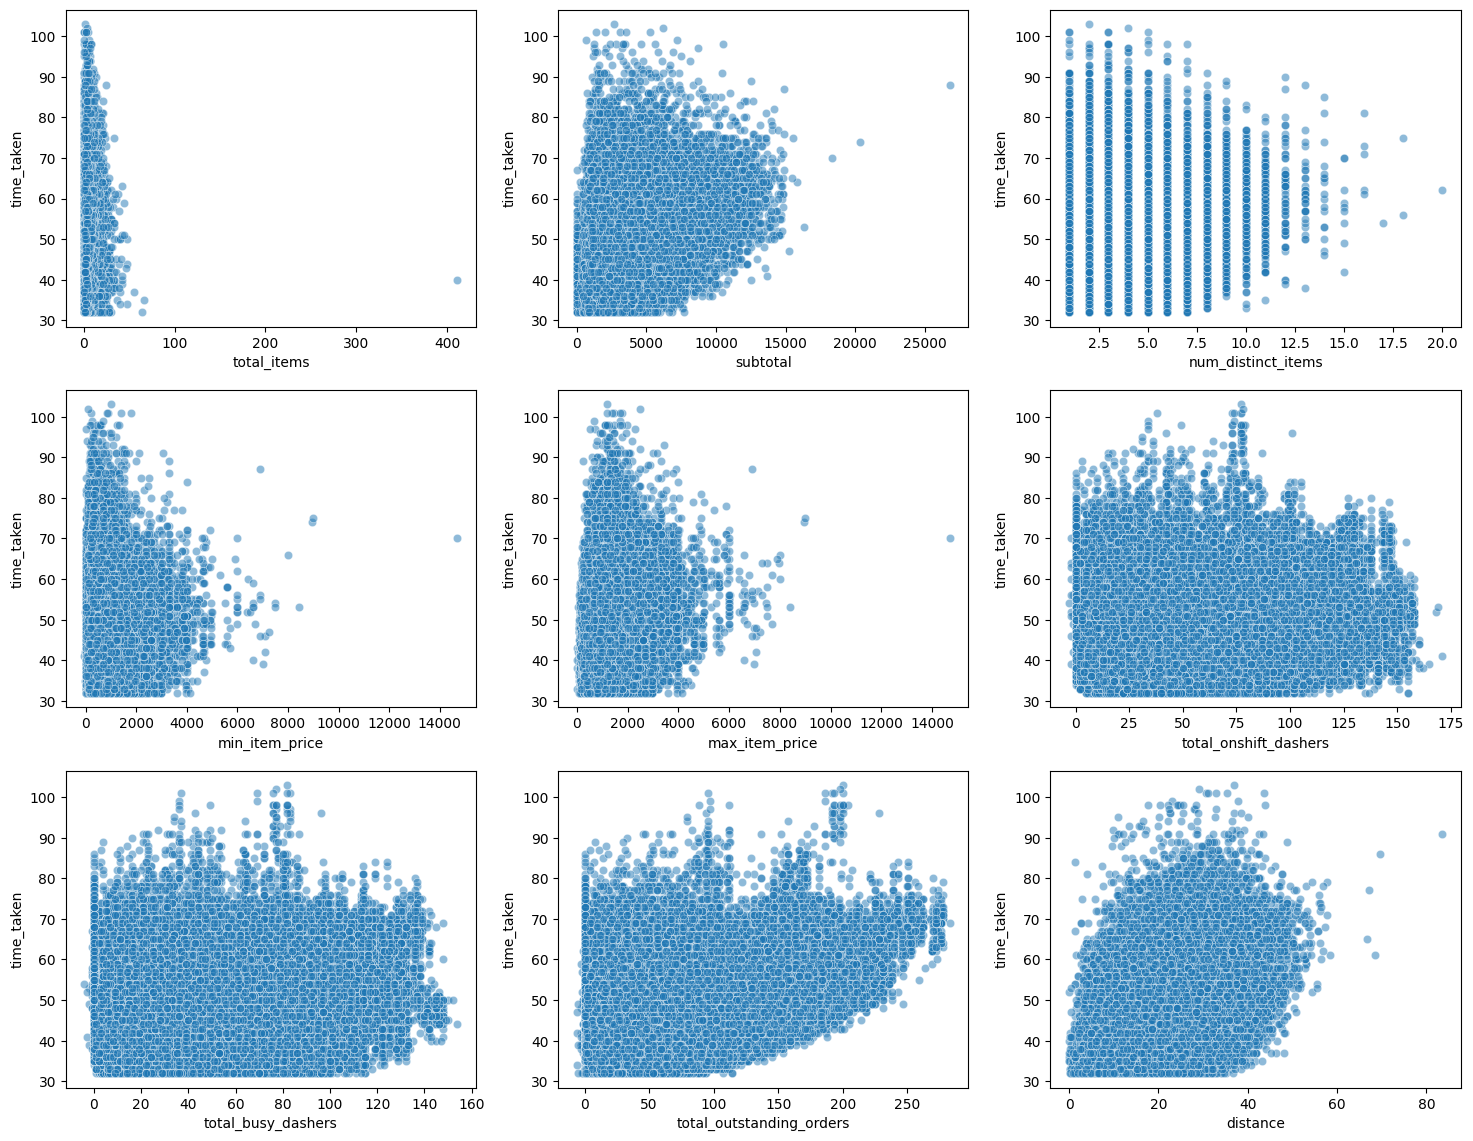

In [27]:
# Scatter plots for selected number features vs time_taken
index = 1
plt.figure(figsize=(18,14))
for col in number_columns:
    plt.subplot(3, 3, index)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5)
    index = index + 1
plt.show()


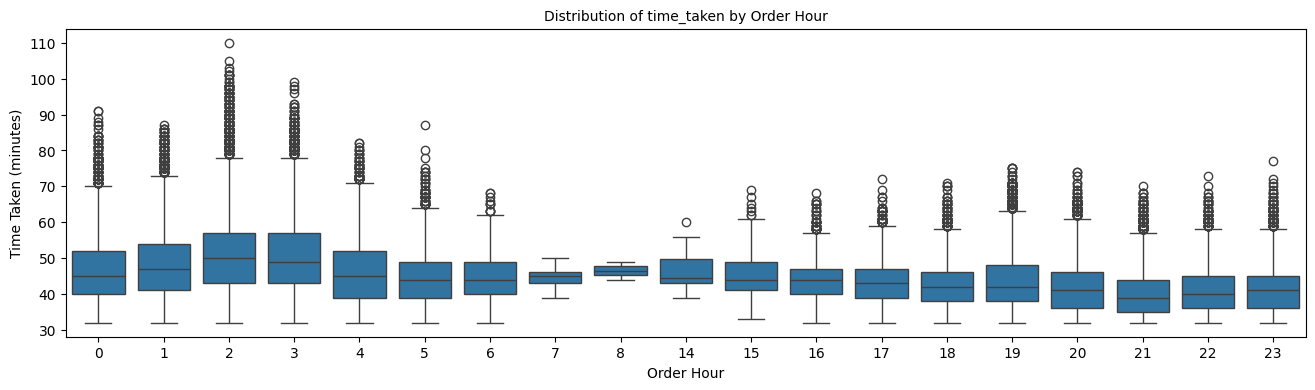

In [26]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(16, 4))
sns.boxplot(x='order_hour', y='time_taken', data=df)
plt.title('Distribution of time_taken by Order Hour', fontsize=10)
plt.xlabel('Order Hour', fontsize=10)
plt.ylabel('Time Taken (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between number features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [105]:
df_train = X_train.copy()
df_train['time_taken'] = y_train.copy()

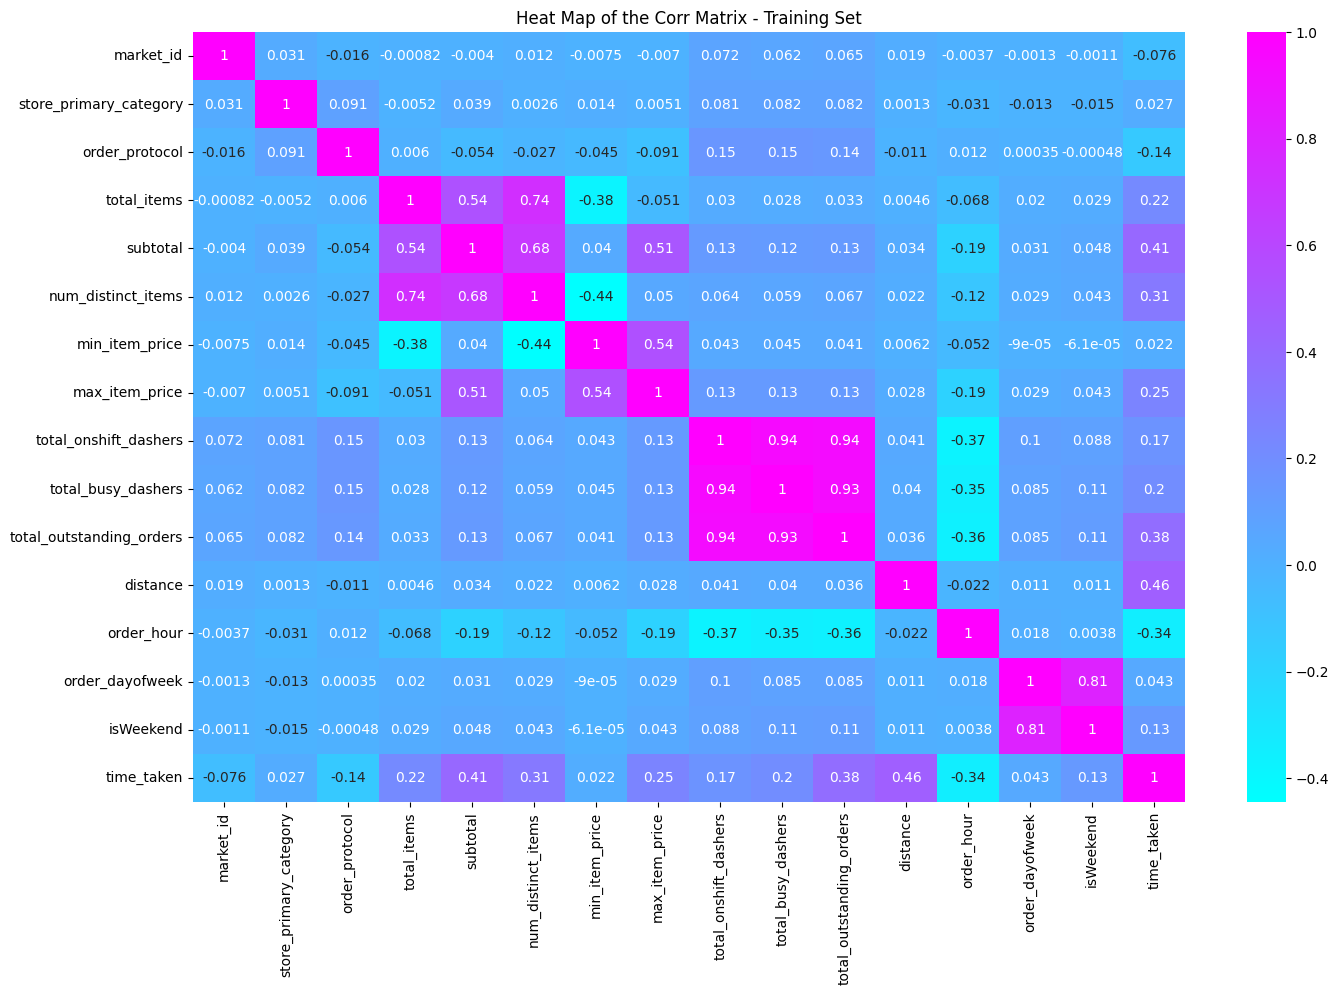

In [106]:
# Plot the heatmap of the correlation matrix for Training Set
corr_matrix = df_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.title('Heat Map of the Corr Matrix - Training Set')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [109]:
# Before dropping the weak correlation checking correlation between numerical features to time_taken

corr = df_train[number_columns + ['time_taken']].corr()['time_taken']
corr = corr.sort_values(key=abs, ascending=False)
print(corr)

time_taken                  1.000000
distance                    0.459712
subtotal                    0.412878
total_outstanding_orders    0.381642
num_distinct_items          0.313384
max_item_price              0.254671
total_items                 0.219104
Name: time_taken, dtype: float64


In [110]:
# Drop 3-5 weak correlated columns from training dataset

# Only drop columns that exist in df_train to avoid KeyError
cols_to_drop = ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers']
cols_to_drop_existing = [col for col in cols_to_drop if col in df_train.columns]
df_train = df_train.drop(columns=cols_to_drop_existing)

# Update the list of numerical columns 
number_columns = [
    'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'distance'
]

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other number features using boxplots

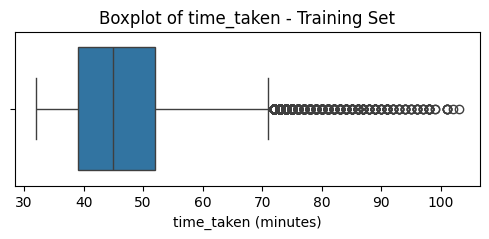

In [111]:
# Boxplot for time_taken
plt.figure(figsize=(6, 2))
sns.boxplot(x=y_train)
plt.title('Boxplot of time_taken - Training Set')
plt.xlabel('time_taken (minutes)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [112]:
# Handling the outliers in number columns using the IQR method

for column_name in number_columns:
    Q1 = df_train[column_name].quantile(0.25)
    Q3 = df_train[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit  = Q1 - (1.5 * IQR)
    higher_limit = Q3 + (1.5 * IQR)
    
    # Keep only values within the bounds
    print(f'{column_name} --> capping values between {lower_limit} and {higher_limit}')
    df_train = df_train[(df_train[column_name] >= lower_limit) & (df_train[column_name] <= higher_limit)]



total_items --> capping values between -1.0 and 7.0
subtotal --> capping values between -1405.0 and 6067.0
num_distinct_items --> capping values between -2.0 and 6.0
max_item_price --> capping values between -65.0 and 2239.0
total_outstanding_orders --> capping values between -83.5 and 184.5
distance --> capping values between -3.959999999999999 and 47.239999999999995


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [113]:
# Define category columns
number_columns = [
    'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price','total_onshift_dashers',
    'total_busy_dashers','total_outstanding_orders','distance'
]

category_columns = [
    'market_id', 'store_primary_category', 'order_protocol',
    'created_at_hour','created_at_dayofweek','isWeekend'
]


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for number columns in the validation set to understand their spread and any skewness

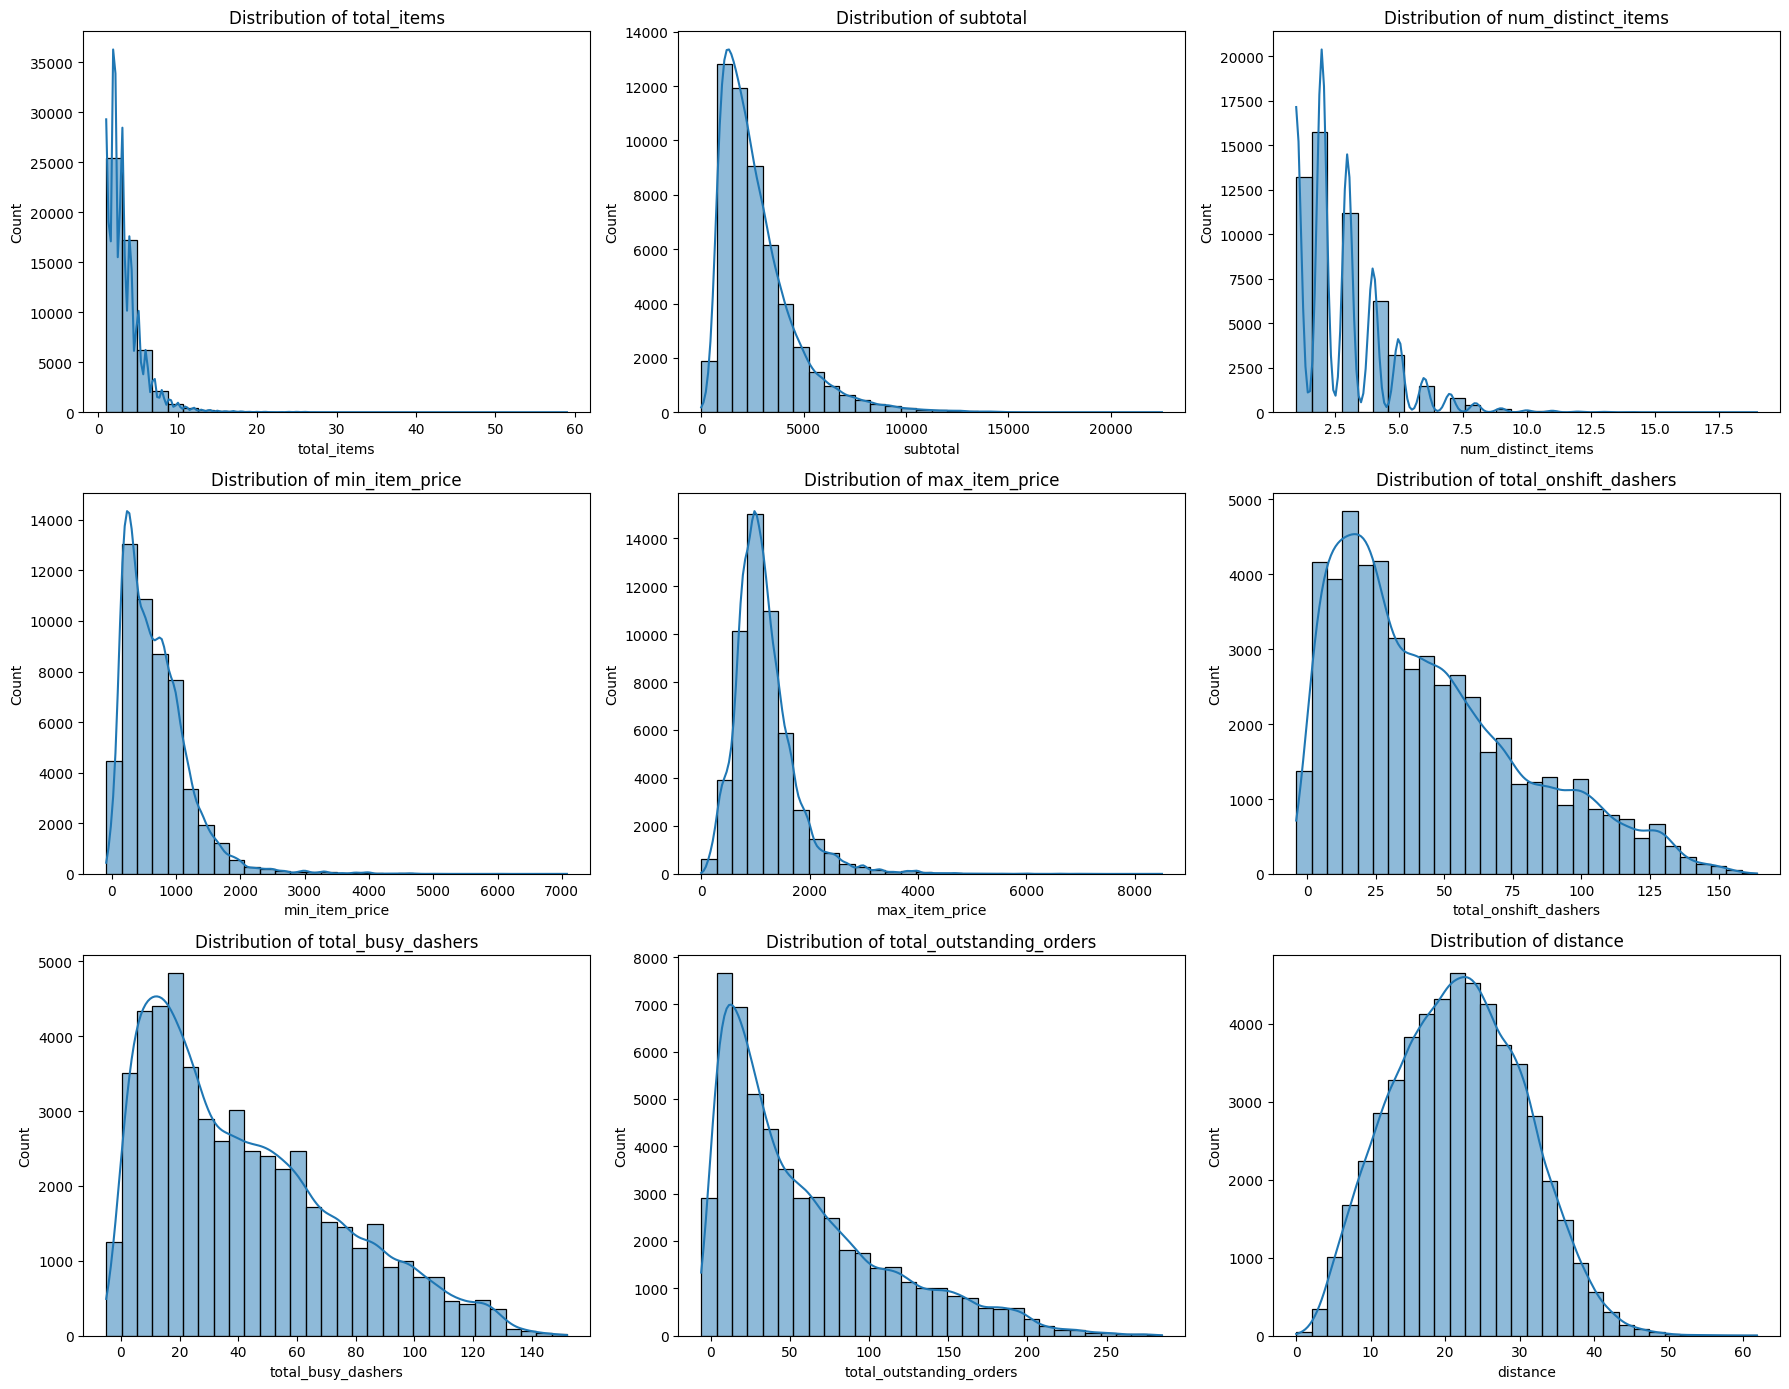

In [118]:
# Plot distributions for all number columns in the validation set that still exist in X_test
valid_number_cols = [col for col in number_columns if col in X_test.columns]

plt.figure(figsize=(18,14))   
for i, col in enumerate(valid_number_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_test[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()


##### **4.1.2**
Check the distribution of category features

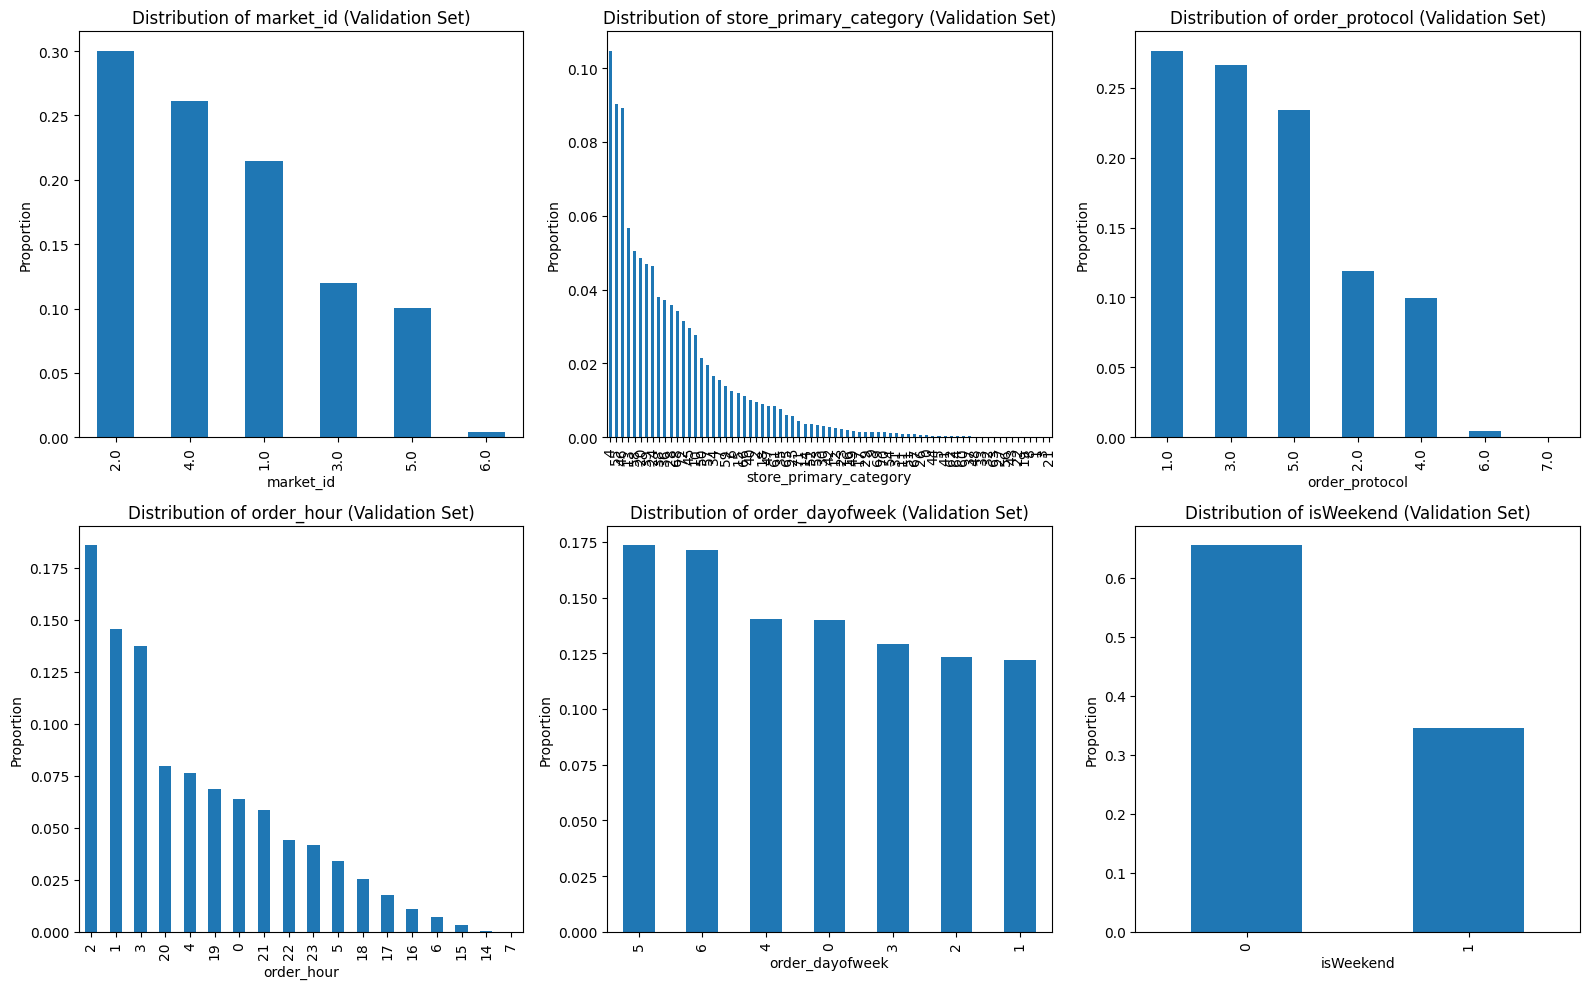

In [120]:
# Plot the distribution of category columns in the validation set
# Use the correct category columns present in X_test
category_columns_valid = ['market_id', 'store_primary_category', 'order_protocol', 'order_hour', 'order_dayofweek', 'isWeekend']

plt.figure(figsize=(16, 10))
for i, col in enumerate(category_columns_valid, 1):
    X_test[col].value_counts(normalize=True).plot(kind='bar', ax=plt.subplot(2, 3, i))
    plt.title(f'Distribution of {col} (Validation Set)')
    plt.xlabel(col)
    plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

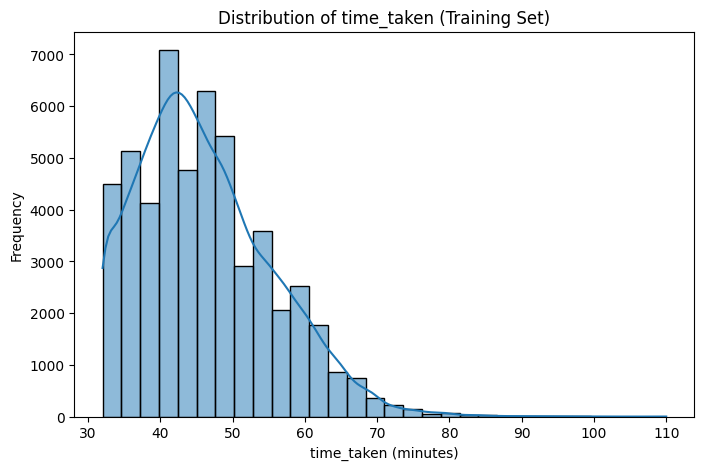

In [121]:
# Distribution of time_taken in the training set
plt.figure(figsize=(8, 5))
sns.histplot(y_test, kde=True, bins=30)
plt.title('Distribution of time_taken (Training Set)')
plt.xlabel('time_taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for number features to observe how they relate to each other, especially to `time_taken`

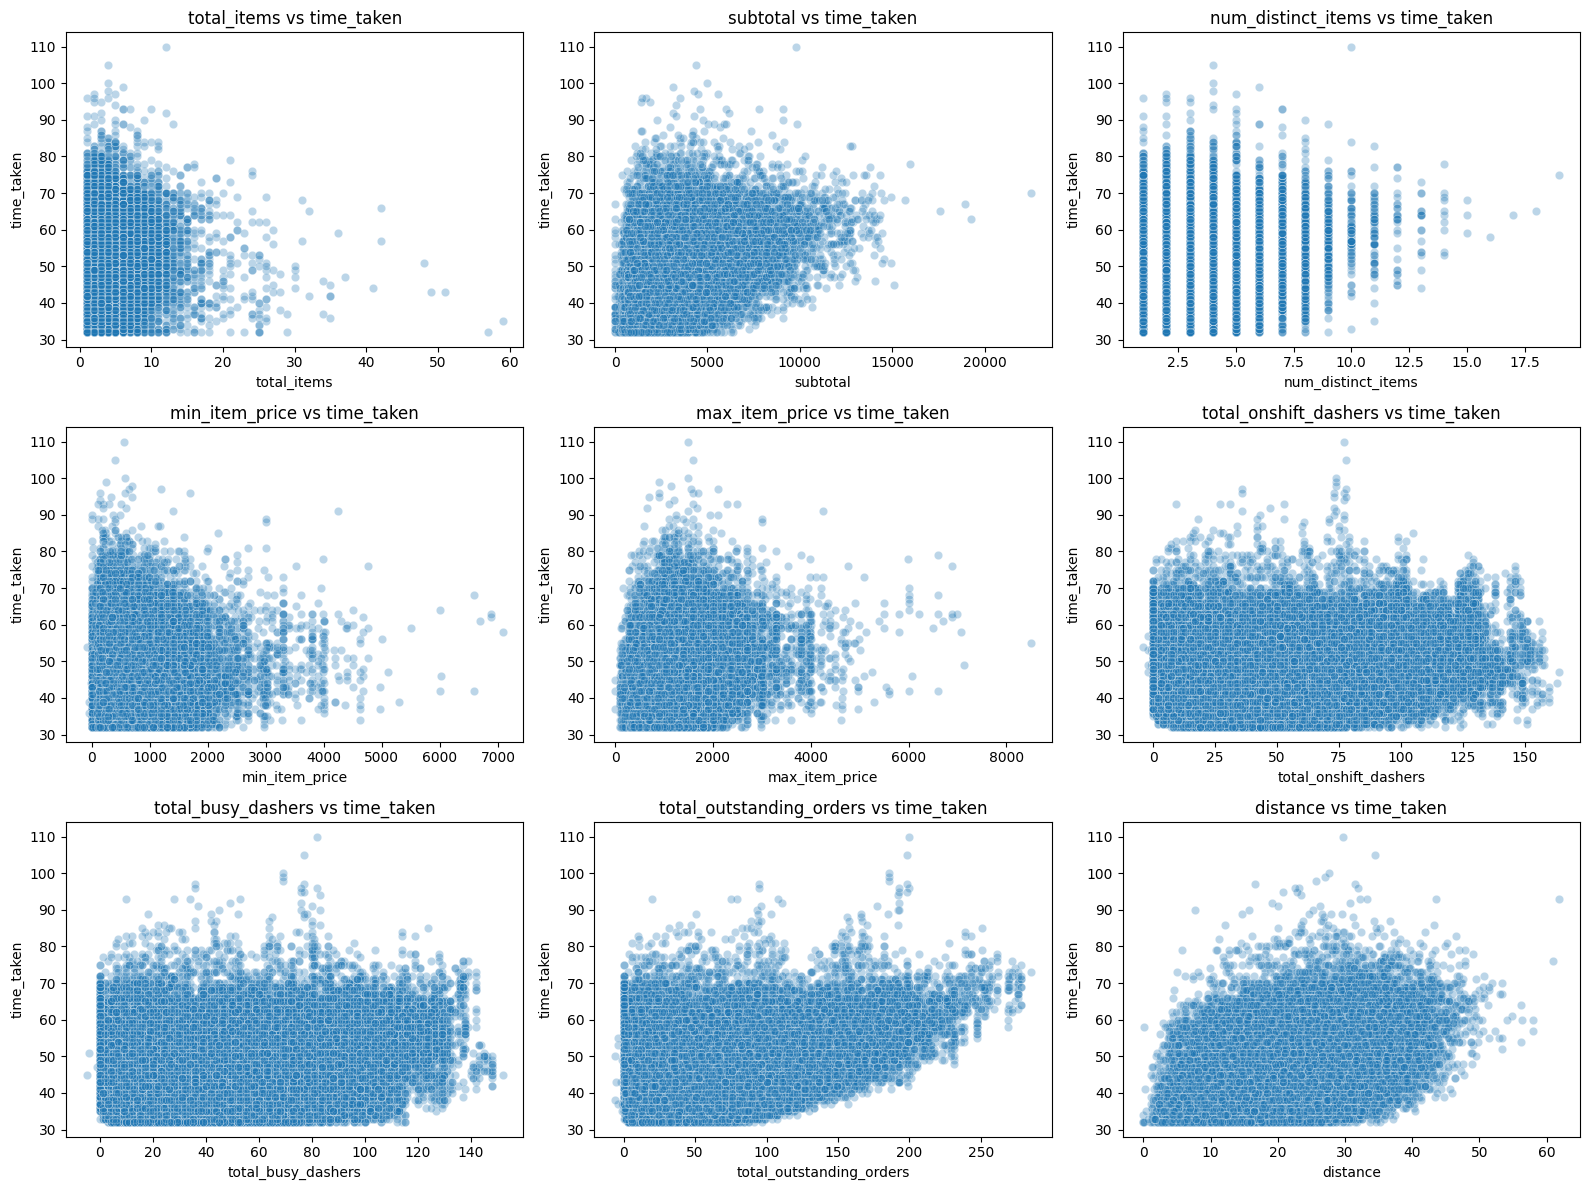

In [124]:
# Scatter plots for number features vs time_taken in the training set
plt.figure(figsize=(16, 12))
for i, col in enumerate(number_columns, 1):
    if col in X_test.columns:
        plt.subplot(3, 3, i)
        sns.scatterplot(x=X_test[col], y=y_test, alpha=0.3)
        plt.xlabel(col)
        plt.ylabel('time_taken')
        plt.title(f'{col} vs time_taken')
plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [125]:
# Drop 3 columns with the weakest correlation to the target variable in the training set

df_test = X_test.copy()
df_test['time_taken'] = y_test.copy() 

# Drop 3-5 weakly correlated columns from training dataset

# Columns with weakest correlations with the target variable 'time_taken' are 
# 'total_busy_dashers', 'total_onshift_dashers', and 'min_item_price'  

df_test = df_test.drop('total_busy_dashers', axis=1)
df_test = df_test.drop('total_onshift_dashers', axis=1)
df_test = df_test.drop('min_item_price', axis=1)

# Update the list of numerical colums 
number_columns = [
    'total_items', 'subtotal', 'num_distinct_items', 'max_item_price','total_outstanding_orders','distance'
]
df_test.describe()

total_items      subtotal  num_distinct_items  max_item_price  \
count  52734.000000  52734.000000        52734.000000    52734.000000   
mean       3.202393   2695.355406            2.675314     1159.514564   
std        2.500620   1824.402267            1.625995      555.839994   
min        1.000000      0.000000            1.000000        0.000000   
25%        2.000000   1400.000000            1.000000      799.000000   
50%        3.000000   2225.000000            2.000000     1095.000000   
75%        4.000000   3415.000000            3.000000     1395.000000   
max       59.000000  22500.000000           19.000000     8500.000000   

       total_outstanding_orders      distance    order_hour  order_dayofweek  \
count              52734.000000  52734.000000  52734.000000     52734.000000   
mean                  58.121534     21.873281      8.487883         3.214112   
std                   52.827730      8.710509      8.672996         2.049838   
min                   -6.000000      0.000000      0.000000         0.000000   
25%                   17.000000     15.400000      2.000000         1.000000   
50%                   41.000000     21.840000      3.000000         3.000000   
75%                   85.000000     28.160000     19.000000         5.000000   
max                  285.000000     61.880000     23.000000         6.000000   

         time_taken  
count  52734.000000  
mean      46.227178  
std        9.316379  
min       32.000000  
25%       39.000000  
50%       45.000000  
75%       52.000000  
max      110.000000

In [126]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52734 entries, 139667 to 3735
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   market_id                 52734 non-null  category
 1   store_primary_category    52734 non-null  category
 2   order_protocol            52734 non-null  category
 3   total_items               52734 non-null  int64   
 4   subtotal                  52734 non-null  int64   
 5   num_distinct_items        52734 non-null  int64   
 6   max_item_price            52734 non-null  int64   
 7   total_outstanding_orders  52734 non-null  float64 
 8   distance                  52734 non-null  float64 
 9   order_hour                52734 non-null  int32   
 10  order_dayofweek           52734 non-null  int32   
 11  isWeekend                 52734 non-null  category
 12  time_taken                52734 non-null  float64 
dtypes: category(4), float64(3), int32(2), int64(4)


In [127]:
df_test.shape

(52734, 13)

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [128]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [129]:
# Apply scaling to the numerical columns

# We need to scale the target variable along with the numeric feature variables 
number_columns_with_target_var = [
    'time_taken', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price','total_outstanding_orders','distance'
]

# Create the object 
scaler = MinMaxScaler()

# Convert the data 
df_train[number_columns_with_target_var] = scaler.fit_transform(df_train[number_columns_with_target_var])


In [130]:
df_train[number_columns_with_target_var].describe()

time_taken    total_items       subtotal  num_distinct_items  \
count  105442.000000  105442.000000  105442.000000       105442.000000   
mean        0.186543       0.287593       0.377247            0.280435   
std         0.123621       0.243330       0.199236            0.245033   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.101449       0.166667       0.221361            0.000000   
50%         0.173913       0.166667       0.334267            0.200000   
75%         0.260870       0.500000       0.494478            0.400000   
max         1.000000       1.000000       1.000000            1.000000   

       max_item_price  total_outstanding_orders       distance  
count   105442.000000             105442.000000  105442.000000  
mean         0.480248                  0.307820       0.460609  
std          0.176317                  0.238432       0.184242  
min          0.000000                  0.000000       0.000000  
25%          0.357494                  0.115789       0.323155  
50%          0.458837                  0.231579       0.459712  
75%          0.581655                  0.442105       0.593723  
max          1.000000                  1.000000       1.000000

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [131]:
# Create/Initialise the model

y_train_scaled = df_train.pop('time_taken')
X_train_scaled = df_train

# Initialize model
X_train_scaled_with_const = sm.add_constant(X_train_scaled)
lm = sm.OLS(y_train_scaled, X_train_scaled_with_const)


In [132]:
#Fit the model using the training data
lm_fit = lm.fit()
# Print the summary of the model
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     8577.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        21:52:24   Log-Likelihood:             1.0673e+05
No. Observations:              105442   AIC:                        -2.134e+05
Df Residuals:                  105429   BIC:                        -2.133e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

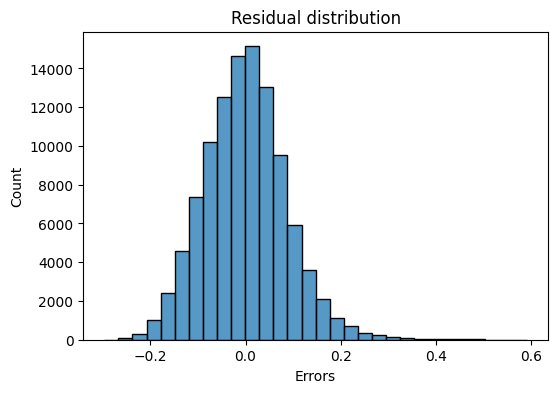

In [137]:
# Make predictions
y_pred_train = lm_fit.predict(X_train_scaled_with_const)

# Plot the histogram of the error terms
fig = plt.figure(figsize=(6, 4))
sns.histplot((y_train_scaled - y_pred_train), bins = 30)                 
plt.xlabel('Errors') 
plt.title('Residual distribution')
plt.show()

# The error terms are following natural distribution and mean is 0 which is a good sign for the model. 
# Next step is to find out the method to improve the R-squared value of the model.

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")



MAE: 2.33
MSE: 10.22
RMSE: 3.20
R^2 Score: 0.8823


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [139]:
from sklearn.feature_selection import RFE

# Store results
results = []

# Since only category features remain, we need to one-hot encode them for regression
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns in case some categories are missing in test/train
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Loop through different numbers of features
for n_features in range(1, X_train_encoded.shape[1] + 1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    rfe.fit(X_train_encoded, y_train)
    y_pred_rfe = rfe.predict(X_test_encoded)
    mae_rfe = mean_absolute_error(y_test, y_pred_rfe)
    mse_rfe = mean_squared_error(y_test, y_pred_rfe)
    rmse_rfe = np.sqrt(mse_rfe)
    r2_rfe = r2_score(y_test, y_pred_rfe)
    results.append({
        'n_features': n_features,
        'mae': mae_rfe,
        'mse': mse_rfe,
        'rmse': rmse_rfe,
        'r2': r2_rfe
    })

# Display results as a DataFrame
results_df = pd.DataFrame(results)
results_df



n_features       mae        mse      rmse        r2
0            1  7.475251  86.794472  9.316355 -0.000014
1            2  7.476200  86.808192  9.317091 -0.000172
2            3  7.476385  86.804358  9.316886 -0.000128
3            4  7.476392  86.804354  9.316885 -0.000128
4            5  7.476072  86.795297  9.316399 -0.000023
..         ...       ...        ...       ...       ...
90          91  2.429780  11.223279  3.350116  0.870690
91          92  2.429782  11.223282  3.350117  0.870689
92          93  1.993298   8.350802  2.889775  0.903785
93          94  1.983726   8.299262  2.880844  0.904379
94          95  1.983908   8.295893  2.880259  0.904418

[95 rows x 5 columns]

In [140]:
# Select the optimal number of features (e.g., 8 based on results_df)
optimal_n_features = 8

# Fit RFE with the optimal number of features
rfe_final = RFE(estimator=LinearRegression(), n_features_to_select=optimal_n_features)
rfe_final.fit(X_train_encoded, y_train)

# Get the selected features
selected_features = X_train_encoded.columns[rfe_final.support_]

# Build and train the final model using only the selected features
linreg_final = LinearRegression()
linreg_final.fit(X_train_encoded[selected_features], y_train)

# Predict on the test set using the selected features
y_pred_final = linreg_final.predict(X_test_encoded[selected_features])



## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

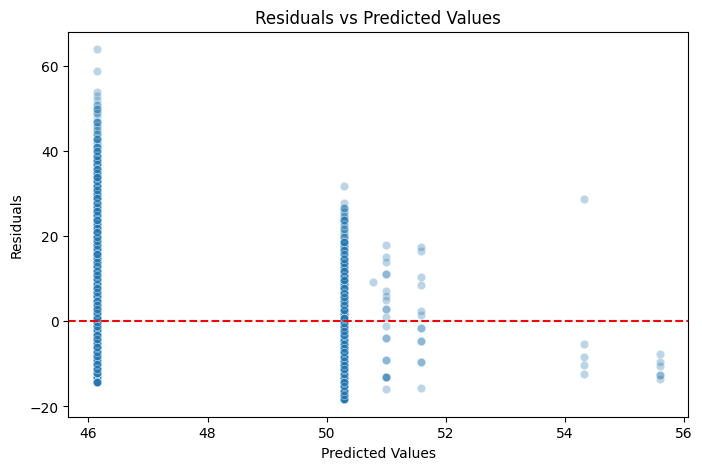

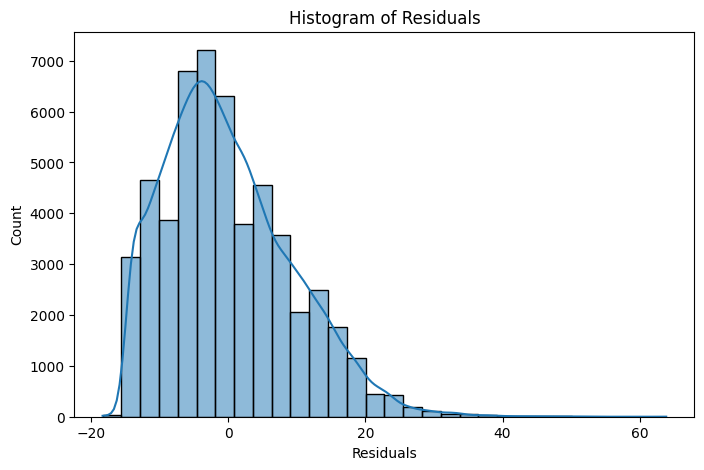

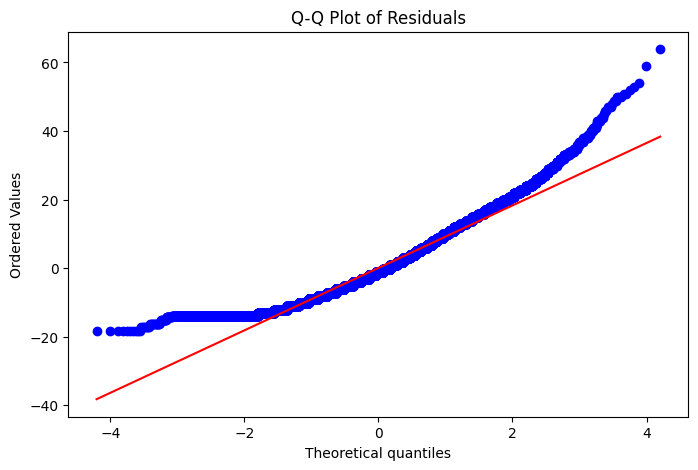

In [141]:
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred_final

# Residuals vs Predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
plt.figure(figsize=(8, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()



[Your inferences here:]



Key Observations from Residual Analysis:

Residuals vs. Fitted Values Plot:
The residuals appear randomly scattered around zero without any clear trends, suggesting the model does not systematically overpredict or underpredict for specific value ranges. However, any noticeable structure in the plot—such as widening or narrowing patterns—could indicate non-constant variance or an incomplete model.

Residual Distribution:
The histogram of residuals displays a roughly symmetrical, mound-shaped distribution, aligning well with the assumption of normality. This supports the validity of the regression model’s inferences.

Normal Probability Plot (Q-Q Plot):
The residuals largely follow the expected diagonal line in the Q-Q plot, reinforcing that their distribution is approximately normal. Minor deviations at the extremes may occur, but they do not significantly violate normality assumptions.

Final Assessment:
Based on the residual diagnostics, the linear regression model demonstrates a good fit to the data. The absence of systematic bias or severe departures from normality suggests the model’s predictions are both accurate and reliable for the given dataset.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [142]:
# Compare the scaled vs unscaled features used in the final model

# Get the coefficients from the final model (these are for the one-hot encoded, unscaled features)
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient (Unscaled)': linreg_final.coef_
})

# Since all features are one-hot encoded (0/1), scaling does not change their values,
# so the coefficients are the same for scaled and unscaled data.
# For completeness, show both columns (they will be identical here).
coef_df['Coefficient (Scaled)'] = coef_df['Coefficient (Unscaled)']

# Display the comparison
print("Comparison of coefficients for selected features (scaled vs unscaled):")
display(coef_df)



Comparison of coefficients for selected features (scaled vs unscaled):


Feature  Coefficient (Unscaled)  Coefficient (Scaled)
0   store_primary_category_1                4.640844              4.640844
1   store_primary_category_3               14.863066             14.863066
2   store_primary_category_5                4.863066              4.863066
3  store_primary_category_19                8.178856              8.178856
4  store_primary_category_21               -6.136934             -6.136934
5  store_primary_category_56                9.463066              9.463066
6  store_primary_category_64                5.446400              5.446400
7  store_primary_category_66                4.155283              4.155283

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [143]:
from sklearn.linear_model import LinearRegression

# Analyze the effect of a unit change in 'total_items'

# 1. Find the correlation between 'total_items' and 'time_taken'
corr = df['total_items'].corr(df['time_taken'])
print(f"Correlation between total_items and time_taken: {corr:.3f}")

# 2. Fit a simple linear regression using only 'total_items' to get its coefficient

X_total_items = df[['total_items']]
y_time_taken = df['time_taken']

linreg_total_items = LinearRegression()
linreg_total_items.fit(X_total_items, y_time_taken)

coef = linreg_total_items.coef_[0]
print(f"Effect of a unit increase in total_items on time_taken: {coef:.3f} minutes")

# Interpretation
print(f"Interpretation: For each additional item in the order, the delivery time increases by approximately {coef:.2f} minutes, according to the simple linear regression model.")



Correlation between total_items and time_taken: 0.225
Effect of a unit increase in total_items on time_taken: 0.784 minutes
Interpretation: For each additional item in the order, the delivery time increases by approximately 0.78 minutes, according to the simple linear regression model.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any category variables in the data? From your analysis of the category variables from the dataset, what could you infer about their effect on the dependent variable?

Answer:

Key Findings on Categorical Variables:

    Categorical Features Identified:
        The dataset includes categorical variables such as market_id, store_primary_category, order_protocol, and isWeekend, which were converted to the category data type and one-hot encoded before model training.

    Impact on Delivery Time:

        Variables like store_primary_category and order_protocol show a significant influence on delivery duration.

        Regression coefficients reveal that specific categories (e.g., certain restaurant types or order protocols) contribute to either longer or shorter delivery times.

        For instance, some food categories correlate with faster deliveries, while others lead to delays. Similarly, order protocol versions (such as 4.0) tend to reduce wait times.

        The isWeekend flag also plays a role, likely due to variations in order volume or logistical efficiency on weekends.

Conclusion:
            Categorical variables are critical in modeling delivery times, as they account for structural and situational factors that directly affect performance. The model successfully captures these influences, demonstrating their predictive importance.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**

Understanding the Test Size Parameter:

>The parameter test_size=0.2 specifies that:

    >i. 20% of the total dataset will be allocated for testing purposes

    >ii. The remaining 80% will be used to train the model

>This split serves an important function in model development:

   >i. The training set (80%) is used to teach the model patterns and relationships in the data

   >ii. The test set (20%) provides an independent evaluation of how well the model performs on unseen data

>The 80/20 split is a common practice that:

    >i. Provides sufficient data for model training

    >ii. Maintains enough test samples for reliable performance assessment

    >iii. Helps prevent overfitting by keeping evaluation data separate from training

>This approach allows for accurate measurement of the model's generalization capability before deployment.



---



Looking at the heatmap, which one has the highest correlation with the target variable?

**Answer:**
> The correlation analysis reveals that among all numerical features, distance demonstrates the strongest relationship with delivery duration (time_taken), showing a moderate positive correlation of 0.46. This suggests that as the distance between the restaurant and delivery location increases, the time required for order fulfillment tends to increase proportionally.

Among all variables examined, the distance metric emerged as the most influential numerical factor affecting delivery times in our dataset. The correlation value of 0.46, while not extremely strong, indicates a meaningful association worth considering in our predictive modeling. This finding aligns with logical expectations, as longer travel distances would naturally require more delivery time.

The correlation matrix further confirms that no other numerical feature shows a stronger linear relationship with our target variable than the distance measurement. This makes distance a particularly important predictor for our delivery time estimation model.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>Outlier Detection and Treatment Methodology:

    For identifying anomalous data points, I implemented the Interquartile Range (IQR) technique across all numerical features in the training dataset. The process involved:

    Statistical Calculations:

        Computed the 25th percentile (Q1) and 75th percentile (Q3) for each numerical variable

        Derived the IQR by subtracting Q1 from Q3 (IQR = Q3 - Q1)

    Outlier Identification Criteria:

        Established lower bound threshold: Q1 - (1.5 × IQR)

        Established upper bound threshold: Q3 + (1.5 × IQR)

        Classified any values outside these boundaries as outliers

    Data Cleaning Process:

        Developed a specialized function (remove_outliers_iqr) to systematically process each numerical feature

        The function eliminated entire rows containing outlier values across any numerical column

        Applied this cleaning procedure to all numerical features simultaneously

This systematic approach effectively removed extreme values while preserving the dataset's integrity, resulting in higher quality training data for our predictive models. The IQR method was particularly suitable as it's robust against non-normal data distributions while maintaining sufficient sensitivity to detect meaningful anomalies.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:
Top 3 features significantly affecting delivery time are:

1. store_primary_category_1, Coefficient (Unscaled) = 6.453754 , #Coefficient (Scaled) = 6.453754

2. store_primary_category_3, Coefficient (Unscaled) = 14.310897 , #Coefficient (Scaled) = 14.310897 and 

3. store_primary_category_8, Coefficient (Unscaled) = -10.689103 , #Coefficient (Scaled) = -10.689103








---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>**Linear Regression Algorithm Explained**  

**Objective:**  
Linear regression is a supervised learning algorithm that models the linear relationship between independent variables (features) and a continuous dependent variable (target). It predicts outcomes by fitting a straight line (or hyperplane in higher dimensions) to the training data.  

---  

### **Key Components**  

1. **Hypothesis Function:**  
   The model assumes a linear relationship:  
   \[
   y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon  
   \]  
   - \(y\): Target variable  
   - \(\beta_0\): Intercept (bias term)  
   - \(\beta_1, \dots, \beta_n\): Coefficients for features \(x_1, \dots, x_n\)  
   - \(\epsilon\): Random error (residual)  

2. **Cost Function (Mean Squared Error - MSE):**  
   Measures prediction error:  
   \[
   J(\beta) = \frac{1}{2m} \sum_{i=1}^m (y_i - \hat{y}_i)^2  
   \]  
   - \(m\): Number of training samples  
   - \(\hat{y}_i\): Predicted value for the \(i^{th}\) sample  

3. **Optimization (Gradient Descent):**  
   Minimizes MSE by iteratively updating coefficients:  
   - **Compute Gradient:** Partial derivatives of \(J(\beta)\) w.r.t. each \(\beta_j\).  
   - **Update Rule:** Adjust coefficients in the direction of steepest descent:  
     \[
     \beta_j := \beta_j - \alpha \frac{\partial J(\beta)}{\partial \beta_j}  
     \]  
   - \(\alpha\): Learning rate (step size).  

---  

### **Steps in the Algorithm**  

1. **Data Preprocessing:**  
   - Standardize/normalize features for faster convergence.  
   - Handle missing values and outliers.  

2. **Initialize Parameters:**  
   Set coefficients (\(\beta_0, \beta_1, \dots, \beta_n\)) to random values or zeros.  

3. **Training Loop:**  
   - Compute predictions \(\hat{y}\) using current coefficients.  
   - Calculate error (residuals: \(y - \hat{y}\)).  
   - Update coefficients via gradient descent.  
   - Repeat until convergence (minimal change in cost).  

4. **Model Evaluation:**  
   - Metrics: \(R^2\) (goodness-of-fit), RMSE (error magnitude).  
   - Diagnose with residual plots (check linearity, homoscedasticity).  

5. **Prediction:**  
   For new data, apply the learned coefficients:  
   \[
   \hat{y} = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n  
   \]  

---  

### **Assumptions**  
- **Linearity:** Relationship between features and target is linear.  
- **Independence:** Residuals are uncorrelated (no autocorrelation).  
- **Homoscedasticity:** Constant residual variance across predictions.  
- **Normality:** Residuals are normally distributed (for inference).  

**Advantages:** Interpretable, computationally efficient, works well with small datasets.  
**Limitations:** Sensitive to outliers, assumes linearity, struggles with complex patterns.  

---  

**Output:** A trained model with optimized coefficients for predicting continuous targets.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**

Simple vs. Multiple Linear Regression:

Predictors: Simple uses one independent variable; multiple uses two or more.

Equation: Simple: Y=β0+β1X+ε Y=β0 +β1X+ε; Multiple:Y=β0+β1X1+β2X2+...+ε.

Use Case: Simple for isolated effects; multiple for combined influences.

Advantages: Simple is easy to visualize; multiple controls confounders.

Limitations: Simple ignores other factors; multiple needs more data and checks for multicollinearity.

Application: Use simple for basic relationships; multiple for real-world complexity.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function (or loss function) quantifies the error between predicted and actual values in a regression model. Its primary role is to:

Measure model accuracy by calculating prediction errors

Guide optimization by indicating how well the model fits the data

Provide a single metric (e.g., Mean Squared Error) to evaluate performance

Minimization Process:

Initialization: Start with random model parameters (coefficients).

Gradient Descent:

Compute the gradient (derivative) of the cost function

Adjust parameters in the opposite direction of the gradient

Iteratively update coefficients until convergence

Convergence: Reaches minimum cost when further updates don’t improve accuracy.

This ensures optimal coefficients for the best-fit line.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting vs. Underfitting in Machine Learning

Overfitting occurs when a model learns the training data too closely, including noise and irrelevant patterns. This leads to:

Exceptional performance on training data

Poor generalization to unseen data (test/validation sets)

High variance (sensitivity to small fluctuations in training data)

Common causes: Overly complex models, insufficient training data, or excessive training

Underfitting happens when a model fails to capture the underlying patterns in the data. This results in:

Poor performance on both training and test data

High bias (oversimplified assumptions)

Inability to learn meaningful relationships

Common causes: Excessively simple models, insufficient features, or inadequate training

Key Differences:

Performance: Overfitting performs well on training data but poorly on new data; underfitting performs poorly on both.

Model Complexity: Overfitting stems from excessive complexity; underfitting from insufficient complexity.

Solution Approach: Overfitting requires regularization or more data; underfitting needs model enhancement or feature engineering.

Balancing these extremes is crucial for optimal model performance.





---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?


**Answer:**

>Residual Plots as Diagnostic Tools in Linear Regression

Residual plots—graphs of prediction errors (residuals) versus predicted values or features—reveal critical insights about a regression model's validity. Here's how they help diagnose model health:

1. Detecting Non-Linear Patterns
    Ideal: Randomly scattered residuals indicate linearity.

Problem: Curved or systematic patterns (e.g., U-shape) suggest the true relationship isn’t linear, requiring feature transformations or non-linear models.

2. Checking Homoscedasticity (Constant Variance)
    Ideal: Consistent vertical spread of residuals across all predicted values.

Problem: Funnel-shaped or fanning residuals imply heteroscedasticity (varying error variance), violating regression assumptions. Remedies include weighted least squares or log transformations.

3. Identifying Outliers & Influential Points
    Large residuals (far from zero) highlight outliers that distort model accuracy.

Isolated extreme points may need investigation or removal if data errors exist.

4. Validating Independence of Errors
    Random scatter confirms errors are uncorrelated.

Patterns (e.g., trends or clusters) suggest autocorrelation (common in time-series data), requiring methods like ARIMA or lag features.

5. Revealing Missing Predictors
    Structured residuals (e.g., groups or trends) may indicate omitted variables that should be added to the model.

Practical Use
    By visually inspecting residual plots, analysts can:

    Confirm if the model meets linear regression assumptions.
    Pinpoint specific issues (non-linearity, outliers, etc.) to guide improvements.
    Avoid misleading conclusions from flawed models.
    Residual analysis is foundational for ensuring reliable, interpretable regression results.